### Start with numpy data

In [1]:
import numpy as np

#### Create a numeric data set with 3 inputs and 1 output

In [2]:
num_rows = 1000

np.random.seed(1234)
data_1 = np.random.normal(loc=0, scale=1.0, size=[num_rows, 3])

# Calculate the label column
data_1 = np.hstack((data_1,
                    np.apply_along_axis(func1d = lambda x: x[1] * np.sin(x[0]) + x[2],
                                        axis = 1,
                                        arr = data_1).reshape(num_rows, 1)))
#data_1
data_1.shape

(1000, 4)

#### Matplotlib

In [3]:
import matplotlib.pyplot as plt

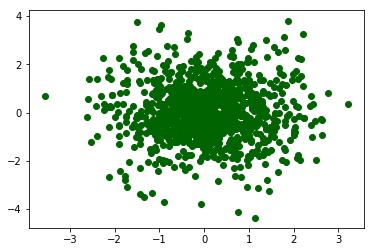

In [4]:
plt.scatter(data_1[:, 0], data_1[:, 3], color='darkgreen')
plt.show()

### Pytorch with optim
https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#nn-module

In [6]:
import torch

In [7]:
# Create tensors from np data
x = torch.from_numpy(data_1[:,0:3])
y = torch.from_numpy(data_1[:,3])

In [29]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in = x.shape
H1 = 32
H2 = 28
H3 = 16
H4 = 4
D_out = 1

In [30]:
# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H1),
    torch.nn.ReLU(),
    torch.nn.Linear(H1, H2),
    torch.nn.ReLU(),
    torch.nn.Linear(H2, H3),
    torch.nn.ReLU(),
    torch.nn.Linear(H3, H4),
    torch.nn.ReLU(),
    torch.nn.Linear(H4, D_out),
)
loss_fn = torch.nn.MSELoss(reduction='sum')

In [90]:
# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algoriths. The first argument to the Adam constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(2000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x.float())

    # Compute and print loss.
    loss = loss_fn(y_pred, y.float())
    if (t + 1) % 100 == 0:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()

99 1412052.375
199 1412052.375
299 1412052.375
399 1412052.375
499 1412052.375
599 1412052.375
699 1412052.375
799 1412052.375
899 1412052.375
999 1412052.375
1099 1412052.375
1199 1412052.375
1299 1412052.375
1399 1412052.375
1499 1412052.375
1599 1412052.375
1699 1412052.375
1799 1412052.375
1899 1412052.375
1999 1412052.375


#### Perturb the weights

In [82]:
#list(model.parameters())[1]
manipulated_state_dict = model.state_dict()
for i in model.state_dict().keys():
    manipulated_state_dict[i] = \
    torch.add(model.state_dict()[i],
              torch.distributions.normal.Normal(0.0, 0.1).sample(model.state_dict()[i].shape))
model.load_state_dict(manipulated_state_dict)